<a href="https://colab.research.google.com/github/aquapirate/worksheet0/blob/main/2408239_NikishaShrestha2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3.1
# Problem1
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.info()

# identify columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with dtype=object")
print(object_columns)

# display unique values and null counts for each object column
for col in object_columns:
  unique_values = df[col].unique()
  null_count = df[col].isnull().sum()

  print(f"\nColumn: {col}")
  print(f"Unique Values: {unique_values}")
  print(f"Total Null Values: {null_count}")

# dropping columns with dtype=object
numeric_df = df.drop(columns=object_columns)

# saving in new csv file
numeric_file_path = "banknumericdata.csv"
numeric_df.to_csv(numeric_file_path)

# read banknumericdata.csv
numeric_data = pd.read_csv(numeric_file_path)
summary_stats = numeric_data.describe()
print("Summary statistics: ")
print(summary_stats)



Saving bank .csv to bank .csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype=object
Index(['job', 'marital', 'education', 'def

In [ ]:
# Problem2
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.info()

# identifying columns with null values
columns_with_null_values = df.columns[df.isnull().any()]
print("Columns with null values: ")
print(columns_with_null_values)

# as these are numerical data
numerical_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# as these are categorical data
categorical_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
for col in categorical_cols:
    df[col] = df[col].ffill()

print("\nMissing values: ")
print(df.isnull().sum())

num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
  df.drop_duplicates(inplace = True)
  print(f"\nDropped {num_duplicates} duplicate rows.")

num_remaining_duplicates = df.duplicated().sum()
print(f"\nRemaining duplicates after cleaning: {num_remaining_duplicates}")

Saving medical_students_dataset.csv to medical_students_dataset (5).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Columns with null values: 
Index(['Student ID', 'Age', 'Gender', 'Height',

In [21]:
# 3.2
# Problem1
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.info()

# Subset for specific columns and filter for Pclass == 1
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Print the retained columns
print("Retained columns: ", list(first_class_df.columns))

# Calculate statistics for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Print results
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)

# Problem2
# Count the number of null values in the 'Age' column
null_count = first_class_df['Age'].isnull().sum()
print("Number of null values in 'Age' column:", null_count)

# Drop rows with null values in the 'Age' column (create a new DataFrame)
cleaned_df = first_class_df.dropna(subset=['Age'])

# Count the number of null values again
null_count_after = cleaned_df['Age'].isnull().sum()
print("Number of null values in 'Age' column after dropping:", null_count_after)

# Problem3
# 1. Use one-hot encoding to convert the 'Embarked' column into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add these new columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# 3. Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# 4. Print the first few rows of the modified DataFrame to verify the changes
print("First few rows of modified Dataframe: \n",df.head())



Saving Titanic-Dataset (1).csv to Titanic-Dataset (1) (20).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Retained columns:  ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0
Number of null

Saving Titanic-Dataset (1).csv to Titanic-Dataset (1) (7).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


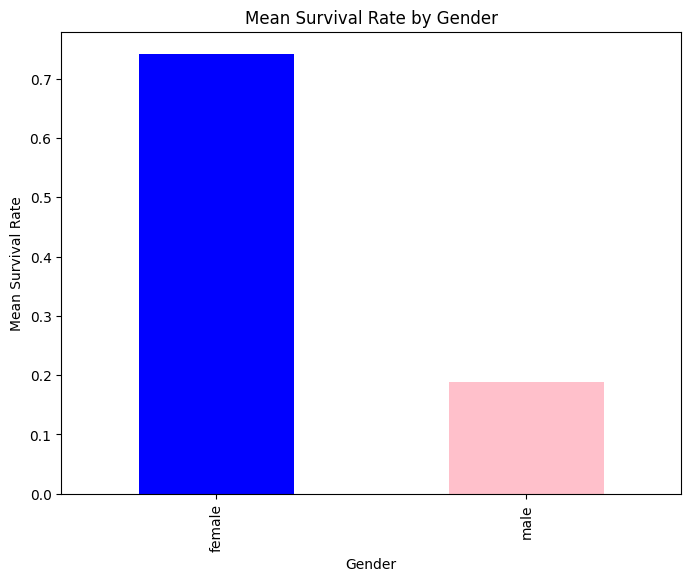

In [ ]:
# Problem4
# Problem1
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import io

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.info()

# Calculate mean survival rate by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)

# Bar plot to compare mean survival rates by gender
plt.figure(figsize=(8, 6))
mean_survival_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

Saving Titanic-Dataset (1).csv to Titanic-Dataset (1) (19).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
First few rows of modified Dataframe: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3 

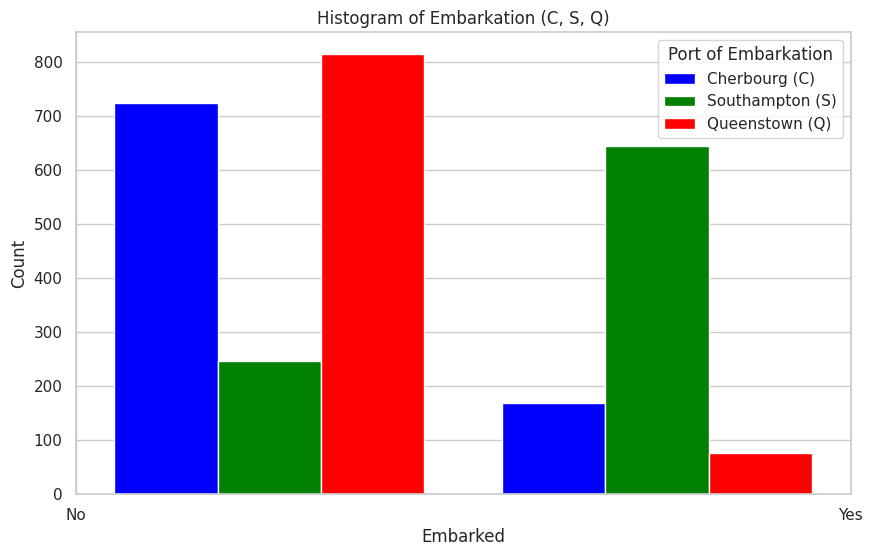

In [20]:
# Problem5
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.info()

# 1. Use one-hot encoding to convert the 'Embarked' column into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add these new columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# 3. Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# 4. Print the first few rows of the modified DataFrame to verify the changes
print("First few rows of modified Dataframe: \n",df.head())

# Convert boolean values to integers (1 for True, 0 for False)
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Plot histogram for 'Embarked_C', 'Embarked_S', and 'Embarked_Q'
plt.hist([df['Embarked_C'], df['Embarked_S'], df['Embarked_Q']], bins=2, label=['Cherbourg (C)', 'Southampton (S)', 'Queenstown (Q)'], color=['blue', 'green', 'red'])

# Add labels and title
plt.title('Histogram of Embarkation (C, S, Q)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # 'No' is 0, 'Yes' is 1
plt.legend(title='Port of Embarkation')

# Display the histogram
plt.show()